# eBay Auction data model development 

# Libraries 

In [10]:
# Importing the all necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data

In [76]:
#Import the dataset
df = pd.read_csv('D:/WhatsApp Documents/Msc Material/Sem 3/SLDM/Ebaydata.csv')

In [77]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [13]:
# EDA: Descriptive statistics for numerical and categorical features
desc_stats = df.describe()
desc_stats_cat = df.describe(include=['O'])
desc_stats_cat

,Category,currency,endDay
count,1972,1972,1972
unique,18,3,7
top,Music/Movie/Game,US,Mon
freq,403,1292,548


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Category        0
currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [15]:
# Frequency distribution for the target variable
freq_dist_target = df['Competitive?'].value_counts()
freq_dist_target

1    1066
0     906
Name: Competitive?, dtype: int64

# Correlation Matrix

In [16]:
correlation_matrix = df.corr()
correlation_matrix

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
sellerRating,1.000000,-0.149734,0.000158,-0.041111,-0.033956
Duration,-0.149734,1.000000,-0.090714,-0.085294,-0.026478
ClosePrice,0.000158,-0.090714,1.000000,0.476932,0.178458
OpenPrice,-0.041111,-0.085294,0.476932,1.000000,-0.096651
Competitive?,-0.033956,-0.026478,0.178458,-0.096651,1.000000


# Visualizations

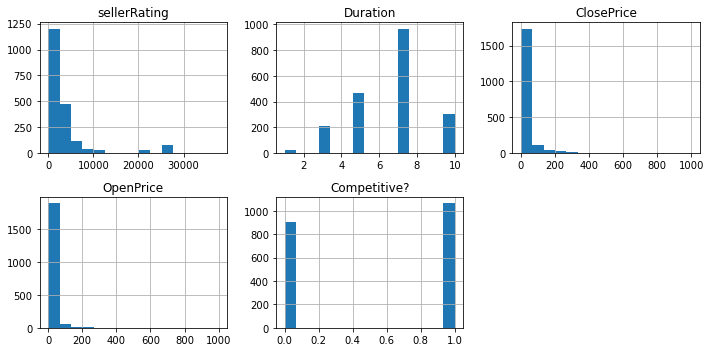

In [17]:
# Histograms for numerical features
df.hist(bins=15, figsize=(10, 5), layout=(2, 3))
plt.tight_layout()
plt.show()

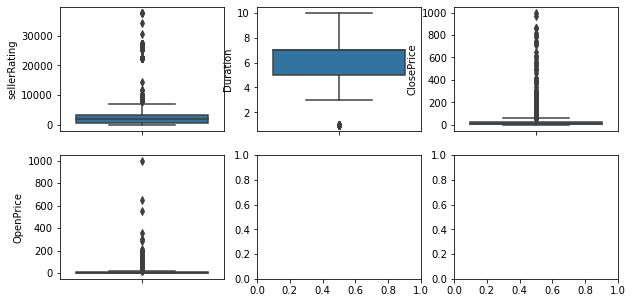

In [18]:
# Boxplots for numerical features
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    if k != 'Competitive?' and pd.api.types.is_numeric_dtype(v):
        sns.boxplot(y=k, data=df, ax=axs[index])
        index += 1

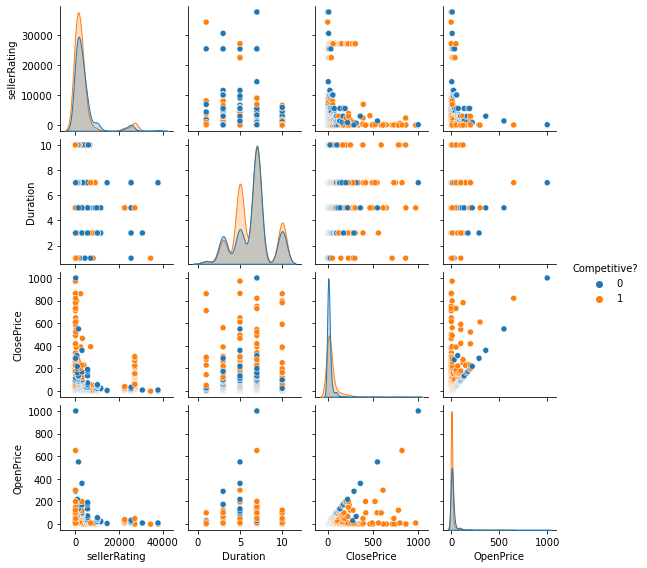

In [19]:
# Pairplot
sns.pairplot(df, hue='Competitive?', height=2)
plt.show()

# Data Preprocessing

In [20]:
#Encoding categorical variables and scaling numerical features
numeric_features = ['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['Category', 'currency', 'endDay']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X = df.drop('Competitive?', axis=1)
y = df['Competitive?']
X_preprocessed = preprocessor.fit_transform(X)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Model training

In [22]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
# Print the evaluation metrics
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)

Logistic Regression Accuracy: 0.7620253164556962
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75       177
           1       0.82      0.72      0.77       218

    accuracy                           0.76       395
   macro avg       0.76      0.77      0.76       395
weighted avg       0.77      0.76      0.76       395



In [23]:
# KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
# Print the evaluation metrics
print("KNN Classifier Accuracy:", accuracy_knn)
print("KNN Classifier Classification Report:\n", report_knn)

KNN Classifier Accuracy: 0.7518987341772152
KNN Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74       177
           1       0.80      0.73      0.76       218

    accuracy                           0.75       395
   macro avg       0.75      0.75      0.75       395
weighted avg       0.76      0.75      0.75       395

